In [64]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, freqz
import pandas as pd

# Definir parâmetros do filtro
freq_de_corte = 0.01/2*np.pi  # Frequência de corte (ajuste conforme necessário)
ordem = 2  # Ordem do filtro

# Gerar um sinal de teste (por exemplo, um sinal senoidal com ruído)
fs = 1000  # Frequência de amostragem em Hz
t = np.linspace(0, 1, fs, endpoint=False)  # Vetor de tempo
sinal = np.sin(1.2 * 2 * np.pi * t) + 0.5 * np.random.randn(t.size)

# Obter os coeficientes do filtro Butterworth
b, a = butter(ordem, freq_de_corte, btype='low', analog=False)

# Aplicar o filtro aos dados
resposta_filtrada = filtfilt(b, a, sinal)
resposta_filtrada_df = pd.DataFrame(resposta_filtrada)

In [65]:
def plot_freq_response(b, a, fs):
    w, h = freqz(b, a, worN=2000)
    plt.figure(figsize=(8,5))
    plt.semilogx(w * fs / (2 * np.pi), 20 * np.log10(abs(h)), 'b')
    plt.xlim(0, 100)
    plt.ylim(-40, 1)   # Limitar o eixo x a 10 Hz
    plt.title('Resposta em Frequência do Filtro Butterworth para Wc = 0,1 rad/s')
    plt.xlabel('Frequência [Hz]')
    plt.ylabel('Ganho [dB]')
    plt.grid()
    plt.show()

C:\Users\camil\AppData\Local\Temp\ipykernel_8744\480265344.py:5: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 100)


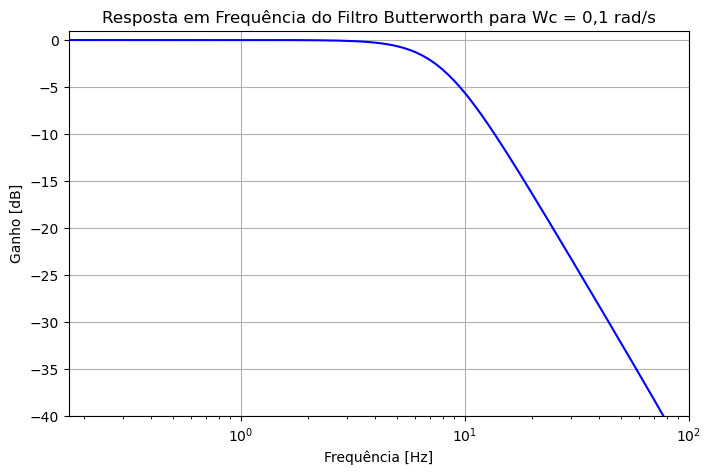

In [66]:
# Plotar a resposta em frequência do módulo do filtro
plot_freq_response(b, a, fs)